In [2]:
import numpy as np
import csv
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 18
ms = 12
lw = 3

fdir   = '/Users/roxanachira/Dropbox/chira2018/pics/data/vsfhr04/'
fcloud = ['M3','M4','M8']
ccloud = ['red','green','blue']
ncols  = 3
nrows  = 1

xlim   = [ 0.0,6.2]
ylim   = [-0.9,2.2]

In [3]:
header = True
ref,rlabel,rp,rzeta,rezeta,rz,rez = np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])

ddir = "/Users/roxanachira/Dropbox/chira2018/pics/data/"
ifile = glob(('%scomp_obs_vsf.csv' % ddir))[0]
with open(ifile,'r') as fin:
    tmp = csv.reader(fin, delimiter=',')
    for row in tmp:
        if(header==True): header = False
        else: 
            ref    = np.append(ref,row[0])
            rlabel = np.append(rlabel,row[3])
            rp      = np.append(rp,int(row[4]))
            rzeta   = np.append(rzeta,float(row[5]))
            rezeta  = np.append(rezeta,float(row[6]))
            rz      = np.append(rz,float(row[7]))
            rez     = np.append(rez,float(row[8]))

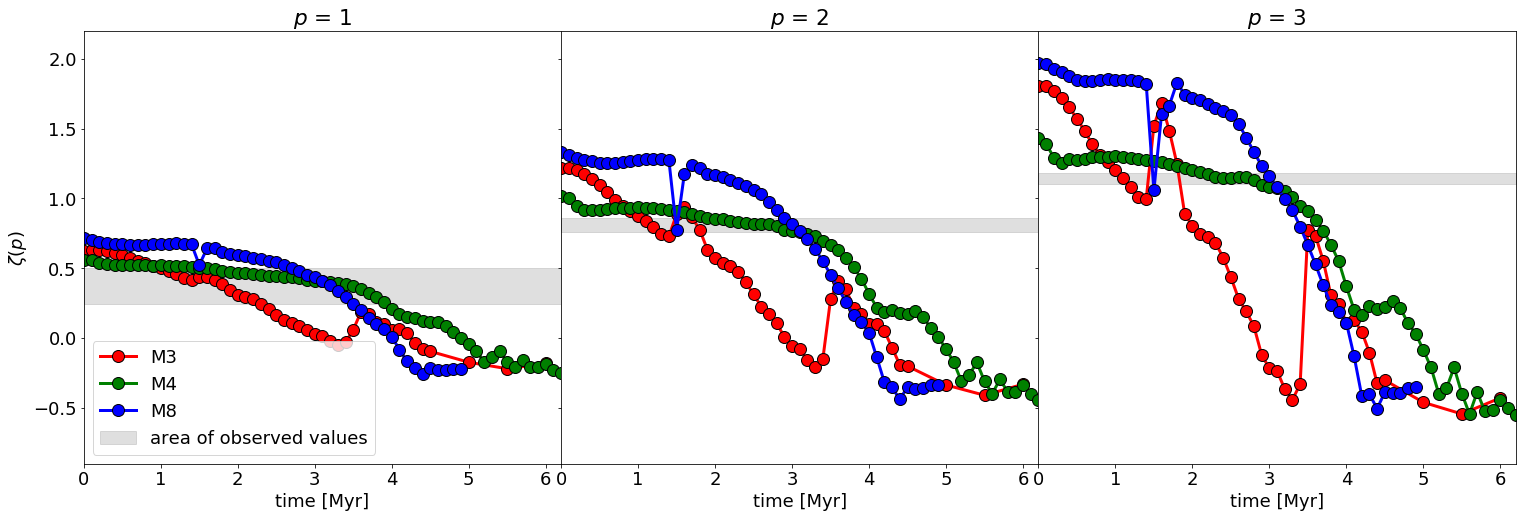

In [4]:
fig,ax = plt.subplots(ncols=ncols,nrows=nrows,sharex=True,sharey=True,figsize=(21,7))

for p in range(3):
    h = np.where(rp == (p+1))[0]
    ax[p].fill_between(xlim,np.array(xlim)*0.+np.min(rzeta[h]),np.array(xlim)*0.+np.max(rzeta[h]),color='grey',alpha=0.25,label='area of observed values')

for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
    
    ifile = glob(('%s/vsfhr04/*%s*' % (ddir,cloud)))[0]
    ttime,tzeta1,tzeta2,tzeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
    time,zeta1,zeta2,zeta3 = np.append(time,ttime),np.append(zeta1,tzeta1),np.append(zeta2,tzeta2),np.append(zeta3,tzeta3)
    
    
    for p in range(3):
        zeta = np.array([])
        if(p == 0):
            title = '$p$ = 1'
            zeta  = zeta1
        elif(p == 1):
            title = '$p$ = 2'
            zeta = zeta2
        else:
            title = '$p$ = 3'
            zeta = zeta3
            
        ax[p].set_title(title)
        ax[p].plot(time,zeta,ls='-',marker='o',label=cloud,color=ccloud[icloud],lw=lw,ms=ms,markeredgecolor='black')

        ax[p].set_xlabel('time [Myr]')

ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)
ax[0].set_ylabel('$\zeta(p)$')
ax[0].legend(loc=3)


fig.tight_layout(pad=0)
fig.subplots_adjust(wspace=0)
plt.savefig('compare_observations.pdf')